In [3]:
import pandas
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
from IPython import get_ipython
import math


get_ipython().run_line_magic('matplotlib', 'inline')

In [38]:
path_folder = "/home/miguel/catkin_ws/src/simulation_files/saved_files_and_results/test_1/simu_2/"
amcl_hybrid = path_folder + "amcl_hybrid"
amcl_RGB = path_folder + "amcl_marker"
amcl_laser = path_folder + "amcl_laser"
type_file =".txt"

amcl_hybrid_result = amcl_hybrid + type_file
amcl_RGB_result = amcl_RGB + type_file
amcl_laser_result = amcl_laser + type_file

amcl_hybrid_numMarker = amcl_hybrid + "_num_markers" + type_file
amcl_RGB_numMarker = amcl_RGB + "_num_markers" + type_file
amcl_laser_numMarker = amcl_laser + "_num_markers" + type_file

amcl_hybrid_numParticles = amcl_hybrid + "_num_particles" + type_file
amcl_RGB_numParticles = amcl_RGB + "_num_particles" + type_file
amcl_laser_numParticles = amcl_laser + "_num_particles" + type_file

amcl_hybrid_ATR = amcl_hybrid + "_ATR" + type_file
amcl_RGB_ATR = amcl_RGB + "_ATR" + type_file
amcl_laser_ATR = amcl_laser + "_ATR" + type_file

In [5]:
data_amcl_hybrid_result = pandas.read_csv(amcl_hybrid_result, skipinitialspace = True)
data_amcl_RGB_result = pandas.read_csv(amcl_RGB_result, skipinitialspace = True)
data_amcl_laser_result = pandas.read_csv(amcl_laser_result, skipinitialspace = True)

data_amcl_hybrid_numMarker = pandas.read_csv(amcl_hybrid_numMarker, skipinitialspace = True, dtype = {"Num Markers" : "int64"})
data_amcl_RGB_numMarker = pandas.read_csv(amcl_RGB_numMarker, skipinitialspace = True)
data_amcl_laser_numMarker = pandas.read_csv(amcl_laser_numMarker, skipinitialspace = True)

data_amcl_hybrid_numParticles = pandas.read_csv(amcl_hybrid_numParticles, skipinitialspace = True)
data_amcl_RGB_numParticles = pandas.read_csv(amcl_RGB_numParticles, skipinitialspace = True)
data_amcl_laser_numParticles = pandas.read_csv(amcl_laser_numParticles, skipinitialspace = True)

data_amcl_hybrid_ATR = pandas.read_csv(amcl_hybrid_ATR, skipinitialspace = True)
data_amcl_RGB_ATR = pandas.read_csv(amcl_RGB_ATR, skipinitialspace = True)
data_amcl_laser_ATR = pandas.read_csv(amcl_laser_ATR, skipinitialspace = True)


In [28]:
countMin = 50
line_width = 1
min_numMarker = -1
max_numMarker = 3
max_time = data_amcl_hybrid_result["Time"][len(data_amcl_hybrid_result["Time"]) - 1]
max_time
sizeCircle = 0.3
coloNumMarker = (1, 0, 1, 0.5)

In [7]:
data_numMarker = list(data_amcl_hybrid_numMarker["Num Markers"])
value = 0
value_save = 0
count = 0
for i in range(len(data_numMarker)):
    if data_numMarker[i] >= value_save:
        value_save = data_numMarker[i]
        count = 0
    else:
        count+=1
        if count > countMin:
            value_save = data_numMarker[i]
        else:
            data_numMarker[i] = value_save
#data_numMarker

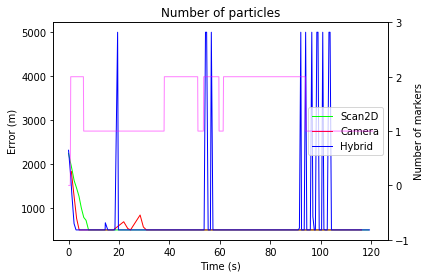

In [39]:
plt.plot(data_amcl_laser_numParticles["Time"],data_amcl_laser_numParticles["Num Particles"], label='Scan2D', color = (0, 1, 0), linewidth = line_width)
plt.plot(data_amcl_RGB_numParticles["Time"],data_amcl_RGB_numParticles["Num Particles"], label='Camera', color = (1, 0, 0), linewidth = line_width)
plt.plot(data_amcl_hybrid_numParticles["Time"],data_amcl_hybrid_numParticles["Num Particles"], label='Hybrid', color = (0, 0, 1), linewidth = line_width)
plt.ylabel("Error (m)")
plt.xlabel("Time (s)")
plt.legend()
plt.title("Number of particles")
plt2 = plt.twinx()
plt2.plot(data_amcl_hybrid_numMarker["Time"], data_numMarker, label='Num Markers', color = coloNumMarker, linewidth = line_width)
plt2.yaxis.set_major_locator(MaxNLocator(integer=True))
plt2.set_ylim(min_numMarker, max_numMarker)
#plt2.legend(loc = 9)
plt.ylabel("Number of markers")
plt.savefig(path_folder + "zNumParticles.png")

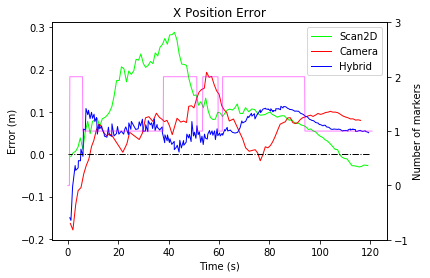

In [30]:
plt.plot(data_amcl_laser_result["Time"],data_amcl_laser_result["X position error"], label='Scan2D', color = (0, 1, 0), linewidth = line_width)
plt.plot(data_amcl_RGB_result["Time"],data_amcl_RGB_result["X position error"], label='Camera', color = (1, 0, 0), linewidth = line_width)
plt.plot(data_amcl_hybrid_result["Time"],data_amcl_hybrid_result["X position error"], label='Hybrid', color = (0, 0, 1), linewidth = line_width)
plt.plot([max_time, 0 ], [0, 0], color = (0,0,0), linewidth = line_width, linestyle = "-.")
plt.ylabel("Error (m)")
plt.xlabel("Time (s)")
plt.legend()
plt.title("X Position Error")
plt2 = plt.twinx()
plt2.plot(data_amcl_hybrid_numMarker["Time"], data_numMarker, label='Num Markers', color = coloNumMarker, linewidth = line_width)
plt2.yaxis.set_major_locator(MaxNLocator(integer=True))
plt2.set_ylim(min_numMarker, max_numMarker)
#plt2.legend(loc = 9)
plt.ylabel("Number of markers")
plt.savefig(path_folder + "zerror_X_position.png")

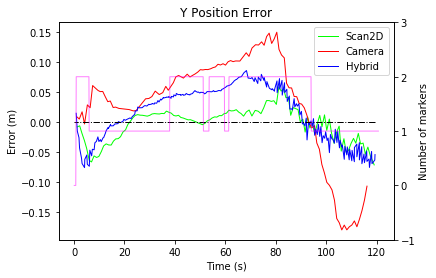

In [31]:
plt.plot(data_amcl_laser_result["Time"],data_amcl_laser_result["Y position error"], label='Scan2D', color = (0, 1, 0), linewidth = line_width)
plt.plot(data_amcl_RGB_result["Time"],data_amcl_RGB_result["Y position error"], label='Camera', color = (1, 0, 0), linewidth = line_width)
plt.plot(data_amcl_hybrid_result["Time"],data_amcl_hybrid_result["Y position error"], label='Hybrid', color = (0, 0, 1), linewidth = line_width)
plt.plot([max_time, 0 ], [0, 0], color = (0,0,0), linewidth = line_width, linestyle = "-.")
plt.ylabel("Error (m)")
plt.xlabel("Time (s)")
plt.legend()
plt2 = plt.twinx()
plt2.plot(data_amcl_hybrid_numMarker["Time"], data_numMarker, label='Num Markers', color = coloNumMarker, linewidth = line_width)
plt2.yaxis.set_major_locator(MaxNLocator(integer=True))
plt2.set_ylim(min_numMarker, max_numMarker)
#plt2.legend(loc = 9)
plt.ylabel("Number of markers")
plt.title("Y Position Error")
plt.savefig(path_folder + "zerror_Y_position.png")

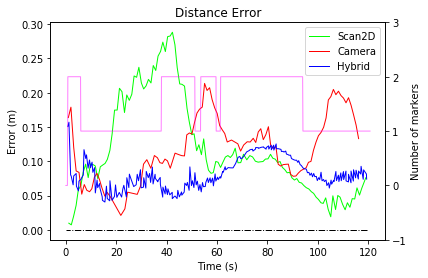

In [32]:
plt.plot(data_amcl_laser_result["Time"],data_amcl_laser_result["Distance error"], label='Scan2D', color = (0, 1, 0), linewidth = line_width)
plt.plot(data_amcl_RGB_result["Time"],data_amcl_RGB_result["Distance error"], label='Camera', color = (1, 0, 0), linewidth = line_width)
plt.plot(data_amcl_hybrid_result["Time"],data_amcl_hybrid_result["Distance error"], label='Hybrid', color = (0, 0, 1), linewidth = line_width)
plt.plot([max_time, 0 ], [0, 0], color = (0,0,0), linewidth = line_width, linestyle = "-.")
plt.ylabel("Error (m)")
plt.xlabel("Time (s)")
plt.legend()
plt2 = plt.twinx()
plt2.plot(data_amcl_hybrid_numMarker["Time"], data_numMarker, label='Num Markers', color = coloNumMarker, linewidth = line_width)
plt2.yaxis.set_major_locator(MaxNLocator(integer=True))
plt2.set_ylim(min_numMarker, max_numMarker)
plt.ylabel("Number of markers")
plt.title("Distance Error")
plt.savefig(path_folder + "zerror_Distance_position.png")

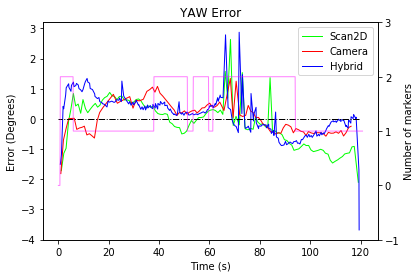

In [33]:
plt.plot(data_amcl_laser_result["Time"],data_amcl_laser_result["YAW error"], label='Scan2D', color = (0, 1, 0), linewidth = line_width)
plt.plot(data_amcl_RGB_result["Time"],data_amcl_RGB_result["YAW error"], label='Camera', color = (1, 0, 0), linewidth = line_width)
plt.plot(data_amcl_hybrid_result["Time"],data_amcl_hybrid_result["YAW error"], label='Hybrid', color = (0, 0, 1), linewidth = line_width)
plt.plot([max_time, 0 ], [0, 0], color = (0,0,0), linewidth = line_width, linestyle = "-.")
plt.ylabel("Error (Degrees)")
plt.xlabel("Time (s)")
plt.legend()
plt2 = plt.twinx()
plt2.plot(data_amcl_hybrid_numMarker["Time"], data_numMarker, label='Num Markers', color = coloNumMarker, linewidth = line_width)
plt2.yaxis.set_major_locator(MaxNLocator(integer=True))
plt2.set_ylim(min_numMarker, max_numMarker)
plt.ylabel("Number of markers")
plt.title("YAW Error")
plt.savefig(path_folder + "zerror_YAW_position.png")

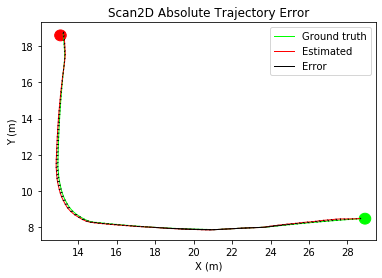

In [34]:
numEnd = 1
plt.plot(data_amcl_laser_ATR["X_gazebo"], data_amcl_laser_ATR["Y_gazebo"], label='Ground truth', color = (0, 1, 0), linewidth = line_width)
plt.plot(data_amcl_laser_ATR["X_amcl"], data_amcl_laser_ATR["Y_amcl"], label='Estimated', color = (1, 0, 0), linewidth = line_width)
plt.plot([data_amcl_laser_ATR["X_gazebo"][0],data_amcl_laser_ATR["X_amcl"][0]],[data_amcl_laser_ATR["Y_gazebo"][0],data_amcl_laser_ATR["Y_amcl"][0]], label= 'Error', color = (0,0,0), linewidth = line_width)
for i in range(len(data_amcl_laser_ATR["X_gazebo"])):
    plt.plot([data_amcl_laser_ATR["X_gazebo"][i],data_amcl_laser_ATR["X_amcl"][i]],[data_amcl_laser_ATR["Y_gazebo"][i],data_amcl_laser_ATR["Y_amcl"][i]], color = (0,0,0), linewidth = line_width)
plt.ylabel("Y (m)")
plt.xlabel("X (m)")
circleIni = plt.Circle((data_amcl_hybrid_ATR["X_amcl"][0],data_amcl_hybrid_ATR["Y_amcl"][0]), sizeCircle, color = (0, 1, 0))
plt.gcf().gca().add_artist(circleIni)
circleEnd = plt.Circle((data_amcl_hybrid_ATR["X_amcl"][len(data_amcl_hybrid_ATR["X_gazebo"]) - numEnd ],data_amcl_hybrid_ATR["Y_amcl"][len(data_amcl_hybrid_ATR["X_gazebo"]) - numEnd]), sizeCircle, color = (1, 0, 0))
plt.gcf().gca().add_artist(circleEnd)
plt.legend()
plt.title("Scan2D Absolute Trajectory Error")
plt.savefig(path_folder + "zzlaser_ATR.png")

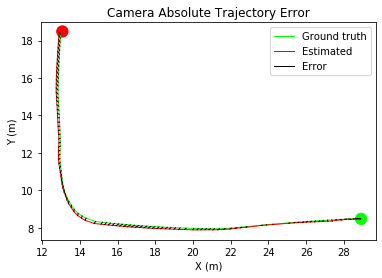

In [23]:
numEnd = 3
plt.plot(data_amcl_RGB_ATR["X_gazebo"], data_amcl_RGB_ATR["Y_gazebo"], label='Ground truth', color = (0, 1, 0), linewidth = line_width)
plt.plot(data_amcl_RGB_ATR["X_amcl"], data_amcl_RGB_ATR["Y_amcl"], label='Estimated', color = (1, 0, 0), linewidth = line_width)
plt.plot([data_amcl_RGB_ATR["X_gazebo"][0],data_amcl_RGB_ATR["X_amcl"][0]],[data_amcl_RGB_ATR["Y_gazebo"][0],data_amcl_RGB_ATR["Y_amcl"][0]], label= 'Error', color = (0,0,0), linewidth = line_width)
for i in range(len(data_amcl_RGB_ATR["X_gazebo"])):
    plt.plot([data_amcl_RGB_ATR["X_gazebo"][i],data_amcl_RGB_ATR["X_amcl"][i]],[data_amcl_RGB_ATR["Y_gazebo"][i],data_amcl_RGB_ATR["Y_amcl"][i]], color = (0,0,0), linewidth = line_width)
plt.ylabel("Y (m)")
plt.xlabel("X (m)")
circleIni = plt.Circle((data_amcl_hybrid_ATR["X_amcl"][0],data_amcl_hybrid_ATR["Y_amcl"][0]), sizeCircle, color = (0, 1, 0))
plt.gcf().gca().add_artist(circleIni)
circleEnd = plt.Circle((data_amcl_hybrid_ATR["X_amcl"][len(data_amcl_hybrid_ATR["X_gazebo"]) - numEnd ],data_amcl_hybrid_ATR["Y_amcl"][len(data_amcl_hybrid_ATR["X_gazebo"]) - numEnd]), sizeCircle, color = (1, 0, 0))
plt.gcf().gca().add_artist(circleEnd)
plt.legend()
plt.title("Camera Absolute Trajectory Error")
plt.savefig(path_folder + "zzCamera_ATR.png")

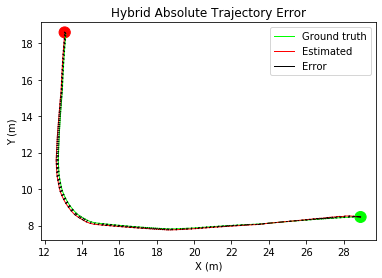

In [24]:
numEnd = 1
plt.plot(data_amcl_hybrid_ATR["X_gazebo"], data_amcl_hybrid_ATR["Y_gazebo"], label='Ground truth', color = (0, 1, 0), linewidth = line_width)
plt.plot(data_amcl_hybrid_ATR["X_amcl"], data_amcl_hybrid_ATR["Y_amcl"], label='Estimated', color = (1, 0, 0), linewidth = line_width)
plt.plot([data_amcl_hybrid_ATR["X_gazebo"][0],data_amcl_hybrid_ATR["X_amcl"][0]],[data_amcl_hybrid_ATR["Y_gazebo"][0],data_amcl_hybrid_ATR["Y_amcl"][0]], label= 'Error', color = (0,0,0), linewidth = line_width)
for i in range(len(data_amcl_hybrid_ATR["X_gazebo"])):
    plt.plot([data_amcl_hybrid_ATR["X_gazebo"][i],data_amcl_hybrid_ATR["X_amcl"][i]],[data_amcl_hybrid_ATR["Y_gazebo"][i],data_amcl_hybrid_ATR["Y_amcl"][i]], color = (0,0,0), linewidth = line_width)
plt.ylabel("Y (m)")
plt.xlabel("X (m)")
circleIni = plt.Circle((data_amcl_hybrid_ATR["X_amcl"][0],data_amcl_hybrid_ATR["Y_amcl"][0]), sizeCircle, color = (0, 1, 0))
plt.gcf().gca().add_artist(circleIni)
circleEnd = plt.Circle((data_amcl_hybrid_ATR["X_amcl"][len(data_amcl_hybrid_ATR["X_gazebo"]) - numEnd ],data_amcl_hybrid_ATR["Y_amcl"][len(data_amcl_hybrid_ATR["X_gazebo"]) - numEnd]), sizeCircle, color = (1, 0, 0))
plt.gcf().gca().add_artist(circleEnd)
plt.legend()
plt.title("Hybrid Absolute Trajectory Error")
plt.savefig(path_folder + "zzHybrid_ATR.png")

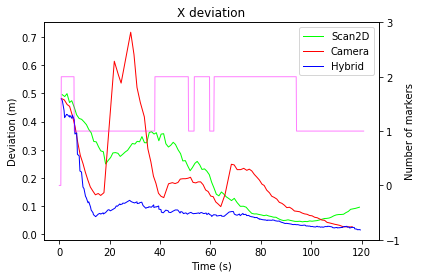

In [35]:
plt.plot(data_amcl_laser_result["Time"],data_amcl_laser_result["X deviation"], label='Scan2D', color = (0, 1, 0), linewidth = line_width)
plt.plot(data_amcl_RGB_result["Time"],data_amcl_RGB_result["X deviation"], label='Camera', color = (1, 0, 0), linewidth = line_width)
plt.plot(data_amcl_hybrid_result["Time"],data_amcl_hybrid_result["X deviation"], label='Hybrid', color = (0, 0, 1), linewidth = line_width)
plt.ylabel("Deviation (m)")
plt.xlabel("Time (s)")
plt.legend()
plt2 = plt.twinx()
plt2.plot(data_amcl_hybrid_numMarker["Time"], data_numMarker, label='Num Markers', color = coloNumMarker, linewidth = line_width)
plt2.yaxis.set_major_locator(MaxNLocator(integer=True))
plt2.set_ylim(min_numMarker, max_numMarker)
plt.ylabel("Number of markers")
#plt2.legend(loc = 9)
plt.title("X deviation")
plt.savefig(path_folder + "zX_deviation.png")

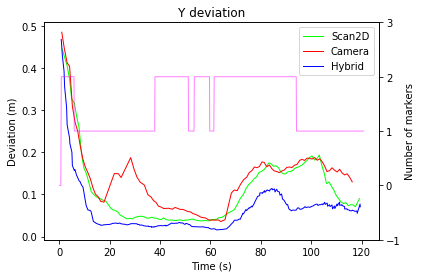

In [36]:
plt.plot(data_amcl_laser_result["Time"],data_amcl_laser_result["Y deviation"], label='Scan2D', color = (0, 1, 0), linewidth = line_width)
plt.plot(data_amcl_RGB_result["Time"],data_amcl_RGB_result["Y deviation"], label='Camera', color = (1, 0, 0), linewidth = line_width)
plt.plot(data_amcl_hybrid_result["Time"],data_amcl_hybrid_result["Y deviation"], label='Hybrid', color = (0, 0, 1), linewidth = line_width)
plt.ylabel("Deviation (m)")
plt.xlabel("Time (s)")
plt.legend()
plt2 = plt.twinx()
plt2.plot(data_amcl_hybrid_numMarker["Time"], data_numMarker, label='Num Markers', color = coloNumMarker, linewidth = line_width)
plt2.yaxis.set_major_locator(MaxNLocator(integer=True))
plt2.set_ylim(min_numMarker, max_numMarker)
plt.ylabel("Number of markers")
#plt2.legend(loc = 9)
plt.title("Y deviation")
plt.savefig(path_folder + "zY_deviation.png")

In [27]:
mean_x_error_laser = round(data_amcl_laser_result["X position error"].abs().mean(), 3)
mean_x_error_RGB = round(data_amcl_RGB_result["X position error"].abs().mean(), 3)
mean_x_error_hybrid = round(data_amcl_hybrid_result["X position error"].abs().mean(), 3)

mean_y_error_laser = round(data_amcl_laser_result["Y position error"].abs().mean(), 3)
mean_y_error_RGB = round(data_amcl_RGB_result["Y position error"].abs().mean(), 3)
mean_y_error_hybrid = round(data_amcl_hybrid_result["Y position error"].abs().mean(), 3)

mean_distance_error_laser = round(data_amcl_laser_result["Distance error"].mean(), 3)
mean_distance_error_RGB = round(data_amcl_RGB_result["Distance error"].mean(), 3)
mean_distance_error_hybrid = round(data_amcl_hybrid_result["Distance error"].mean(), 3)

mean_yaw_error_laser = round(data_amcl_laser_result["YAW error"].abs().mean(), 3)
mean_yaw_error_RGB = round(data_amcl_RGB_result["YAW error"].abs().mean(), 3)
mean_yaw_error_hybrid = round(data_amcl_hybrid_result["YAW error"].abs().mean(), 3)

mean_x_deviation_laser = round(data_amcl_laser_result["X deviation"].mean(), 3)
mean_x_deviation_RGB = round(data_amcl_RGB_result["X deviation"].mean(), 3)
mean_x_deviation_hybrid = round(data_amcl_hybrid_result["X deviation"].mean(), 3)

mean_y_deviation_laser = round(data_amcl_laser_result["Y deviation"].mean(), 3)
mean_y_deviation_RGB = round(data_amcl_RGB_result["Y deviation"].mean(), 3)
mean_y_deviation_hybrid = round(data_amcl_hybrid_result["Y deviation"].mean(), 3)

######### max ######
max_x_error_laser = round(data_amcl_laser_result["X position error"].abs().max(), 3)
max_x_error_RGB = round(data_amcl_RGB_result["X position error"].abs().max(), 3)
max_x_error_hybrid = round(data_amcl_hybrid_result["X position error"].abs().max(), 3)

max_y_error_laser = round(data_amcl_laser_result["Y position error"].abs().max(), 3)
max_y_error_RGB = round(data_amcl_RGB_result["Y position error"].abs().max(), 3)
max_y_error_hybrid = round(data_amcl_hybrid_result["Y position error"].abs().max(), 3)

max_distance_error_laser = round(data_amcl_laser_result["Distance error"].max(), 3)
max_distance_error_RGB = round(data_amcl_RGB_result["Distance error"].max(), 3)
max_distance_error_hybrid = round(data_amcl_hybrid_result["Distance error"].max(), 3)

max_yaw_error_laser = round(data_amcl_laser_result["YAW error"].abs().max(), 3)
max_yaw_error_RGB = round(data_amcl_RGB_result["YAW error"].abs().max(), 3)
max_yaw_error_hybrid = round(data_amcl_hybrid_result["YAW error"].abs().max(), 3)

max_x_deviation_laser = round(data_amcl_laser_result["X deviation"].max(), 3)
max_x_deviation_RGB = round(data_amcl_RGB_result["X deviation"].max(), 3)
max_x_deviation_hybrid = round(data_amcl_hybrid_result["X deviation"].max(), 3)

max_y_deviation_laser = round(data_amcl_laser_result["Y deviation"].max(), 3)
max_y_deviation_RGB = round(data_amcl_RGB_result["Y deviation"].max(), 3)
max_y_deviation_hybrid = round(data_amcl_hybrid_result["Y deviation"].max(), 3)

######### max ######
min_x_error_laser = round(data_amcl_laser_result["X position error"].abs().min(), 3)
min_x_error_RGB = round(data_amcl_RGB_result["X position error"].abs().min(), 3)
min_x_error_hybrid = round(data_amcl_hybrid_result["X position error"].abs().min(), 3)

min_y_error_laser = round(data_amcl_laser_result["Y position error"].abs().min(), 3)
min_y_error_RGB = round(data_amcl_RGB_result["Y position error"].abs().min(), 3)
min_y_error_hybrid = round(data_amcl_hybrid_result["Y position error"].abs().min(), 3)

min_distance_error_laser = round(data_amcl_laser_result["Distance error"].min(), 3)
min_distance_error_RGB = round(data_amcl_RGB_result["Distance error"].min(), 3)
min_distance_error_hybrid = round(data_amcl_hybrid_result["Distance error"].min(), 3)

min_yaw_error_laser = round(data_amcl_laser_result["YAW error"].abs().min(), 3)
min_yaw_error_RGB = round(data_amcl_RGB_result["YAW error"].abs().min(), 3)
min_yaw_error_hybrid = round(data_amcl_hybrid_result["YAW error"].abs().min(), 3)

min_x_deviation_laser = round(data_amcl_laser_result["X deviation"].min(), 3)
min_x_deviation_RGB = round(data_amcl_RGB_result["X deviation"].min(), 3)
min_x_deviation_hybrid = round(data_amcl_hybrid_result["X deviation"].min(), 3)

min_y_deviation_laser = round(data_amcl_laser_result["Y deviation"].min(), 3)
min_y_deviation_RGB = round(data_amcl_RGB_result["Y deviation"].min(), 3)
min_y_deviation_hybrid = round(data_amcl_hybrid_result["Y deviation"].min(), 3)

save_file_laser = path_folder + "zzz_result_laser.txt"
comparative_laser = open(save_file_laser, "w")
comparative_laser.write("mean X error,mean Y error,mean Distance error,mean YAW error,mean X deviation,mean Y desviation")
comparative_laser.write(",max X error,max Y error,max Distance error,max YAW error,max X deviation,max Y desviation")
comparative_laser.write(",min X error,min Y error,min Distance error,min YAW error,min X deviation,min Y desviation\n")
comparative_laser.write(str(mean_x_error_laser) + ",")
comparative_laser.write(str(mean_y_error_laser) + ",")
comparative_laser.write(str(mean_distance_error_laser) + ",")
comparative_laser.write(str(mean_x_deviation_laser) + ",")
comparative_laser.write(str(mean_y_deviation_laser) + ",")

comparative_laser.write(str(max_x_error_laser) + ",")
comparative_laser.write(str(max_y_error_laser) + ",")
comparative_laser.write(str(max_distance_error_laser) + ",")
comparative_laser.write(str(max_x_deviation_laser) + ",")
comparative_laser.write(str(max_y_deviation_laser) + ",")

comparative_laser.write(str(min_x_error_laser) + ",")
comparative_laser.write(str(min_y_error_laser) + ",")
comparative_laser.write(str(min_distance_error_laser) + ",")
comparative_laser.write(str(min_x_deviation_laser) + ",")
comparative_laser.write(str(min_y_deviation_laser))
comparative_laser.close()

save_file_RGB = path_folder + "zzz_result_marker.txt"
comparative_RGB = open(save_file_RGB, "w")
comparative_RGB.write("mean X error,mean Y error,mean Distance error,mean YAW error,mean X deviation,mean Y desviation")
comparative_RGB.write(",max X error,max Y error,max Distance error,max YAW error,max X deviation,max Y desviation")
comparative_RGB.write(",min X error,min Y error,min Distance error,min YAW error,min X deviation,min Y desviation\n")
comparative_RGB.write(str(mean_x_error_RGB) + ",")
comparative_RGB.write(str(mean_y_error_RGB) + ",")
comparative_RGB.write(str(mean_distance_error_RGB) + ",")
comparative_RGB.write(str(mean_x_deviation_RGB) + ",")
comparative_RGB.write(str(mean_y_deviation_RGB) + ",")

comparative_RGB.write(str(max_x_error_RGB) + ",")
comparative_RGB.write(str(max_y_error_RGB) + ",")
comparative_RGB.write(str(max_distance_error_RGB) + ",")
comparative_RGB.write(str(max_x_deviation_RGB) + ",")
comparative_RGB.write(str(max_y_deviation_RGB) + ",")

comparative_RGB.write(str(min_x_error_RGB) + ",")
comparative_RGB.write(str(min_y_error_RGB) + ",")
comparative_RGB.write(str(min_distance_error_RGB) + ",")
comparative_RGB.write(str(min_x_deviation_RGB) + ",")
comparative_RGB.write(str(min_y_deviation_RGB))
comparative_RGB.close()

save_file_hybrid = path_folder + "zzz_result_hybrid.txt"
comparative_hybrid = open(save_file_hybrid, "w")
comparative_hybrid.write("mean X error,mean Y error,mean Distance error,mean YAW error,mean X deviation,mean Y desviation")
comparative_hybrid.write(",max X error,max Y error,max Distance error,max YAW error,max X deviation,max Y desviation")
comparative_hybrid.write(",min X error,min Y error,min Distance error,min YAW error,min X deviation,min Y desviation\n")
comparative_hybrid.write(str(mean_x_error_hybrid) + ",")
comparative_hybrid.write(str(mean_y_error_hybrid) + ",")
comparative_hybrid.write(str(mean_distance_error_hybrid) + ",")
comparative_hybrid.write(str(mean_x_deviation_hybrid) + ",")
comparative_hybrid.write(str(mean_y_deviation_hybrid) + ",")

comparative_hybrid.write(str(max_x_error_hybrid) + ",")
comparative_hybrid.write(str(max_y_error_hybrid) + ",")
comparative_hybrid.write(str(max_distance_error_hybrid) + ",")
comparative_hybrid.write(str(max_x_deviation_hybrid) + ",")
comparative_hybrid.write(str(max_y_deviation_hybrid) + ",")

comparative_hybrid.write(str(min_x_error_hybrid) + ",")
comparative_hybrid.write(str(min_y_error_hybrid) + ",")
comparative_hybrid.write(str(min_distance_error_hybrid) + ",")
comparative_hybrid.write(str(min_x_deviation_hybrid) + ",")
comparative_hybrid.write(str(min_y_deviation_hybrid))
comparative_hybrid.close()